In [284]:
pip install geopandas

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install geopandas matplotlib mapclassify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [300]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import requests
import time

In [ ]:
df = pd.read_excel("C:\Git_test\Project 2 Docs\Data Sets\Spendingbypostcode.xlsx", sheet_name="UK postal district spend", header=1)

df
df.shape

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\David\AppData\Local\Temp\ipykernel_42548\2559124727.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_excel("C:\Git_test\Project 2 Docs\Data Sets\Spendingbypostcode.xlsx", sheet_name="UK postal district spend", header=1)


(263590, 9)

In [ ]:
df.head(10)

,Time period,Postal district,Time of day,Food & grocery,Health care,Other,QSR,Restaurants,Retail goods & services
0,2019Q1,AB10,Morning,41.4,NaN,53.1,2.6,2.9,NaN
1,2019Q1,AB10,Lunchtime,42.1,NaN,50.2,2.5,5.2,NaN
2,2019Q1,AB10,Afternoon,44.8,NaN,46.5,2.4,6.3,NaN
3,2019Q1,AB10,Evening,46.8,NaN,24.1,3.3,25.8,NaN
4,2019Q1,AB10,Night,17.4,NaN,12.1,3.7,66.8,NaN
5,2019Q1,AB11,Morning,12.2,NaN,69.7,2.7,4.6,10.9
6,2019Q1,AB11,Lunchtime,9.0,NaN,68.2,2.0,7.9,12.9
7,2019Q1,AB11,Afternoon,9.2,NaN,66.6,1.7,10.3,12.3
8,2019Q1,AB11,Evening,10.5,NaN,33.9,2.7,48.1,4.8
9,2019Q1,AB11,Night,3.7,NaN,10.0,1.6,82.1,2.6


In [ ]:
print(df.columns)

Index(['Time period', 'Postal district', 'Time of day', 'Food & grocery',
       'Health care', 'Other', 'QSR', 'Restaurants',
       'Retail goods & services'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.title()
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Time Period', 'Postal District', 'Time Of Day', 'Food & Grocery',
       'Health Care', 'Other', 'Qsr', 'Restaurants',
       'Retail Goods & Services'],
      dtype='object')>

In [ ]:
Last_quater_date = df[df['Time Period'].str.contains('Q', na=False)].index.max()

Last_quater_date

263589

In [ ]:
print(list(enumerate(df.columns)))

[(0, 'Time Period'), (1, 'Postal District'), (2, 'Time Of Day'), (3, 'Food & Grocery'), (4, 'Health Care'), (5, 'Other'), (6, 'Qsr'), (7, 'Restaurants'), (8, 'Retail Goods & Services')]


In [ ]:
df.tail(5)

,Time Period,Postal District,Time Of Day,Food & Grocery,Health Care,Other,Qsr,Restaurants,Retail Goods & Services
263585,2024Q2,ZE2,Morning,NaN,NaN,91.2,NaN,7.2,1.6
263586,2024Q2,ZE2,Lunchtime,NaN,NaN,88.9,NaN,8.2,2.8
263587,2024Q2,ZE2,Afternoon,NaN,NaN,91.1,NaN,6.6,2.4
263588,2024Q2,ZE2,Evening,NaN,NaN,82.8,NaN,16.4,0.9
263589,2024Q2,ZE2,Night,NaN,NaN,82.6,NaN,17.4,0.0


In [ ]:
df['District'] = df['Postal District'].str.split().str[0].str.strip()

In [ ]:
df['Time Of Day'].isna().sum()

0

In [ ]:
time_of_day_values = ['Morning', 'Lunchtime', 'Afternoon', 'Evening', 'Night']

In [ ]:
cols = df.columns[3:9] 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
mask = df['Time Of Day'].isin(time_of_day_values)


In [ ]:
mean_by_postcode  = df[mask].groupby('District')[cols].mean()

In [ ]:
global_means = df[cols].mean()

In [ ]:
for col in cols:
    district_fill = df['District'].map(mean_by_postcode[col])
    final_fill = district_fill.fillna(global_means[col])
    df[col] = df[col].fillna(final_fill)


In [ ]:
df.iloc[:, 3:9].isna().sum()

Food & Grocery             0
Health Care                0
Other                      0
Qsr                        0
Restaurants                0
Retail Goods & Services    0
dtype: int64

In [ ]:

print("1. mask.sum():", mask.sum())
print("2. Districts in filtered data:", df[mask]['District'].nunique())
print("3. mean_by_postcode shape:", mean_by_postcode.shape)
print("4. mean_by_postcode.head():\n", mean_by_postcode.head())


for col in cols:
    district_fill = df['District'].map(mean_by_postcode[col])
    print(f"\nFilling {col}:")
    print(" Total NaNs:", district_fill.isna().sum())
    df[col] = df[col].fillna(district_fill).fillna(global_means[col])


1. mask.sum(): 263590
2. Districts in filtered data: 2630
3. mean_by_postcode shape: (2630, 6)
4. mean_by_postcode.head():
           Food & Grocery  Health Care      Other       Qsr  Restaurants  \
District                                                                  
AB10           37.200000     5.965000  48.874545  4.488182    21.814545   
AB11           14.073846          NaN  53.005455  4.026667    27.970476   
AB12           41.715000     1.486667  77.447619  3.641905     2.503000   
AB14                 NaN          NaN  79.109000       NaN    27.854667   
AB15           27.966667     5.376000  73.941818  0.960000    11.345000   

          Retail Goods & Services  
District                           
AB10                     5.836923  
AB11                     8.951000  
AB12                          NaN  
AB14                          NaN  
AB15                     3.387368  

Filling Food & Grocery:
 Total NaNs: 57980

Filling Health Care:
 Total NaNs: 62715

Filling Othe

In [ ]:
df.drop('District', axis=1, inplace=True)

In [ ]:
df['Time Of Day'].isna().sum()

0

In [ ]:
df['Postal District'].isna().sum()

0

In [ ]:
df.reset_index(drop=True)

,Time Period,Postal District,Time Of Day,Food & Grocery,Health Care,Other,Qsr,Restaurants,Retail Goods & Services
0,2019Q1,AB10,Morning,41.400000,5.965000,53.1,2.600,2.9,5.836923
1,2019Q1,AB10,Lunchtime,42.100000,5.965000,50.2,2.500,5.2,5.836923
2,2019Q1,AB10,Afternoon,44.800000,5.965000,46.5,2.400,6.3,5.836923
3,2019Q1,AB10,Evening,46.800000,5.965000,24.1,3.300,25.8,5.836923
4,2019Q1,AB10,Night,17.400000,5.965000,12.1,3.700,66.8,5.836923
...,...,...,...,...,...,...,...,...,...
263585,2024Q2,ZE2,Morning,18.863158,3.699688,91.2,0.868,7.2,1.600000
263586,2024Q2,ZE2,Lunchtime,18.863158,3.699688,88.9,0.868,8.2,2.800000
263587,2024Q2,ZE2,Afternoon,18.863158,3.699688,91.1,0.868,6.6,2.400000
263588,2024Q2,ZE2,Evening,18.863158,3.699688,82.8,0.868,16.4,0.900000


In [ ]:
print(df['Time Period'].dtype)

object


In [ ]:
df['Time Period'] = pd.to_datetime(df['Time Period'], errors='coerce')
print(df['Time Period'])  

0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
263585   2024-04-01
263586   2024-04-01
263587   2024-04-01
263588   2024-04-01
263589   2024-04-01
Name: Time Period, Length: 263590, dtype: datetime64[ns]


C:\Users\David\AppData\Local\Temp\ipykernel_42548\1296370127.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time Period'] = pd.to_datetime(df['Time Period'], errors='coerce')


In [ ]:
df.isna().sum()

Time Period                0
Postal District            0
Time Of Day                0
Food & Grocery             0
Health Care                0
Other                      0
Qsr                        0
Restaurants                0
Retail Goods & Services    0
dtype: int64

In [294]:
df_copy = df.copy()

In [ ]:
API_KEY = 'https://api.getAddress.io/autocomplete/{term}?api-key=zuMguPpTOE-_plgT0_5BWA50010'

In [296]:
Merged_df = df_copy[['Time Period', 'Food & Grocery', 'Health Care', 'Other', 'Qsr', 'Restaurants', 'Retail Goods & Services']]
                      

In [297]:
filtered_df = Merged_df[Merged_df['Time Period'] >= pd.Timestamp('2024-04-01')]

C:\Users\David\AppData\Local\Temp\ipykernel_42548\1123516496.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)


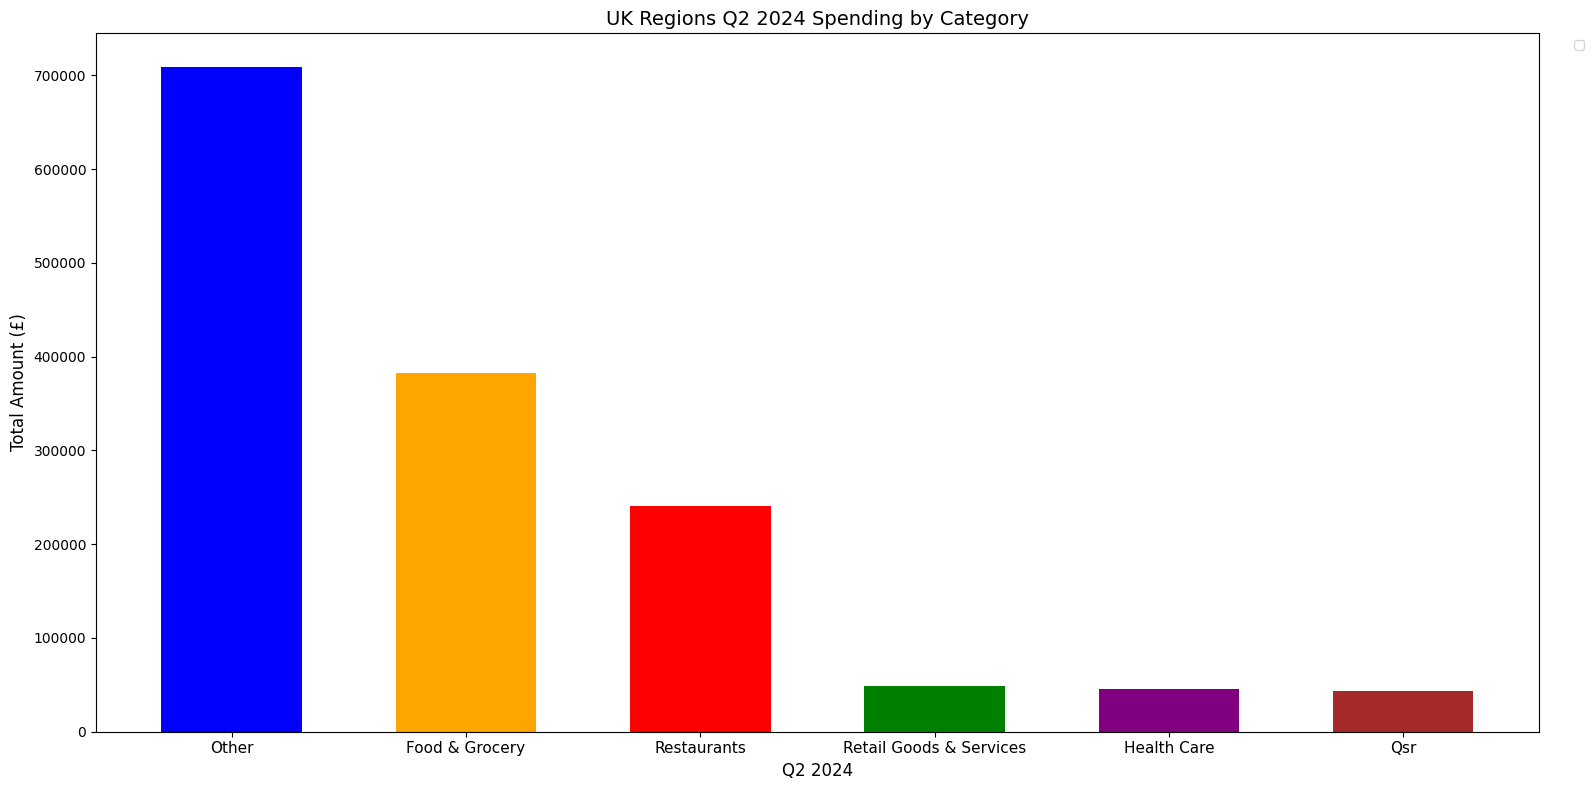

In [298]:

totals = filtered_df[['Food & Grocery', 'Health Care', 'Other', 'Qsr', 'Restaurants', 'Retail Goods & Services']].sum()

sorted_categories = totals.sort_values(ascending=False).index.tolist()
sorted_values = totals[sorted_categories].values

fig, ax = plt.subplots(figsize=(16, 8)) 

x = np.arange(len(sorted_categories))
width = 0.6

ax.bar(x, sorted_values, width, color=['blue','orange','red','green','purple','brown'])

ax.set_xlabel('Q2 2024', fontsize=12)
ax.set_ylabel('Total Amount (£)', fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(sorted_categories, rotation=0, ha='center', fontsize=11)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

plt.title('UK Regions Q2 2024 Spending by Category', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
API_KEY = 'https://api.getAddress.io/autocomplete/{term}?api-key=zuMguPpTOE-_plgT0_5BWA50010'

In [ ]:
df.to_excel('path/to/your/file.xlsx', index=True)